In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from tabulate import tabulate
import statsmodels
import math

In [196]:
import pandas as pd
from tabulate import tabulate

# Read the first CSV file and drop specified columns
df = pd.read_csv(r"Excels\gini_serial_no_district_excel1_csv.csv")
drop_columns = 'arsenic,carbonate,chloride,fluorine,iron,hydrogencarbonate,potassium,magnesium,nitrate,sodium,percentageofsodium,phosphateion,residualsodiumcarbonate,sodiumabsorptionratio,sulfate,silicondioxide,alkalinitytotal,potentialofhydrogen,electricalconductivity,hardnesstotal,totaldissolvedsolids'.split(',')
df = df.drop(columns=drop_columns)
df['SDP'] = None

# Display the modified DataFrame
table = tabulate(df, headers='keys', tablefmt='pretty')

# Read the second CSV file
df2 = pd.read_csv(r"Excels\standardised1999-2022.csv")

# Rename states for consistency
df2 = df2.rename(columns={
    'JAMMU & KASHMIR': 'JAMMU AND KASHMIR',
    'ORISSA': 'ODISHA',
    'TAMIL NADU': 'TAMILNADU',
    'ANDAMAN & NICOBAR ISLANDS': 'ANDAMAN AND NICOBAR ISLANDS',
    'PUDUCHERRY': 'PONDICHERRY'
})

# Create a tabular representation of the DataFrame
table = tabulate(df2, headers='keys', tablefmt='pretty')

# Extract values for SIKKIM in exact years
exact_years = df2['SIKKIM']

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    if (math.isnan(row['year'])): 
        print("Nan found continue")
        continue
    year = row['year']
    state = row['state'].upper()
    # print(year,state)

    # Handle state name inconsistencies
    if state == 'TAMIL NADU':
        state = 'TAMILNADU'
    if state == 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU':
        continue

    # Extract SDP value for the specific year and state
    value = df2.loc[(df2['exact_year'] == year) & (df2[state].notnull()), state].values
    
    # Skip if no value found for the specific year and state
    if len(value) == 0:
        continue

    # Assign SDP value to the corresponding row in the DataFrame
    df.at[index, 'SDP'] = float(value[0])
df = df.drop(['Unnamed: 30', 'Unnamed: 29'], axis=1)



In [197]:
df3 = pd.read_csv(r"Excels\GINI Index.xlsx - Sheet1.csv")
df3 = df3.loc[:, ['Serial No.', 'Gini, 2010 - 2011']]
table3 = tabulate(df3, headers='keys', tablefmt='pretty')
print(table3)

+-----+------------+-------------------+
|     | Serial No. | Gini, 2010 - 2011 |
+-----+------------+-------------------+
|  0  |    nan     |       0.35        |
|  1  |    1.0     |       0.33        |
|  2  |    2.0     |       0.33        |
|  3  |    3.0     |        0.3        |
|  4  |    nan     |       0.33        |
|  5  |    4.0     |       0.26        |
|  6  |    5.0     |       0.24        |
|  7  |    6.0     |       0.33        |
|  8  |    7.0     |       0.27        |
|  9  |    8.0     |       0.27        |
| 10  |    9.0     |       0.28        |
| 11  |    10.0    |       0.35        |
| 12  |    11.0    |       0.33        |
| 13  |    12.0    |       0.31        |
| 14  |    13.0    |       0.42        |
| 15  |    14.0    |       0.27        |
| 16  |    15.0    |       0.28        |
| 17  |    16.0    |       0.26        |
| 18  |    nan     |       0.32        |
| 19  |    17.0    |       0.23        |
| 20  |    18.0    |        0.3        |
| 21  |    19.0 

In [198]:
df['Gini'] = None

for index, row in df.iterrows():
    s_no=row['Serial No.']
    if (math.isnan(s_no)): 
        print("Nan found continue")
        continue
    # print(s_no)

    value = df3.loc[(df3['Serial No.'] == s_no)].values
    df.at[index, 'Gini'] = float(value[0][1])

Nan found continue


In [199]:
table = tabulate(df, headers='keys', tablefmt='pretty')
print(table)

+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+------------+------------------------+-----------+-----------+------+
|       | country |                    state                     |          district           | year |              dyid               | Serial No. |        District        |  calcium  |    SDP    | Gini |
+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+------------+------------------------+-----------+-----------+------+
|   0   |  India  |                 West Bengal                  |     24 Paraganas North      | 2000 |     24 Paraganas North2000      |   625.0    |   North Twenty Four    | 50.588234 | 151670.0  | 0.38 |
|   1   |  India  |                 West Bengal                  |     24 Paraganas North      | 2001 |     24 Paraganas North2001      |   625.0    |   North Twenty Four  

In [200]:
table = tabulate(df, headers='keys',     tablefmt='pretty')
print(table)

+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+------------+------------------------+-----------+-----------+------+
|       | country |                    state                     |          district           | year |              dyid               | Serial No. |        District        |  calcium  |    SDP    | Gini |
+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+------------+------------------------+-----------+-----------+------+
|   0   |  India  |                 West Bengal                  |     24 Paraganas North      | 2000 |     24 Paraganas North2000      |   625.0    |   North Twenty Four    | 50.588234 | 151670.0  | 0.38 |
|   1   |  India  |                 West Bengal                  |     24 Paraganas North      | 2001 |     24 Paraganas North2001      |   625.0    |   North Twenty Four  

In [201]:
df.to_csv(r"Excels\merged_table.csv")

In [202]:
import statsmodels.api as sm
import pandas as pd

# reading data from the csv
data = pd.read_csv(r"Excels\merged_table.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium'], inplace=True)

# defining the variables
x = data['SDP']
y = data['calcium']

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# Get the result summary as HTML
summary_html = result.summary().tables[0].as_html()
summary_html += result.summary().tables[1].as_html()

print(result.summary())

# Write the HTML to a file
with open('summary_table.html', 'w') as file:
    file.write("""
<!DOCTYPE html>
<html>
<head>
<style>
table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

th, td {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 12px;
}

th {
    background-color: #4CAF50;
    color: white;
}

tr:nth-child(even) {
    background-color: #f2f2f2;
}

tr:hover {
    background-color: #ddd;
}

th:hover {
    background-color: #4CAF50;
}

.caption {
    font-style: italic;
    color: #666;
}
</style>
</head>
<body>

""" + summary_html + """

</body>
</html>
""")


                            OLS Regression Results                            
Dep. Variable:                calcium   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     165.0
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.32e-37
Time:                        15:43:56   Log-Likelihood:                -37171.
No. Observations:                7309   AIC:                         7.435e+04
Df Residuals:                    7307   BIC:                         7.436e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3674      0.693     79.845      0.0

In [203]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# reading data from the csv
data = pd.read_csv(r"Excels\merged_table.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium'], inplace=True)

# defining the variables
X = data[['SDP']]  # Feature matrix
y = data['calcium']  # Target variable

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model to the entire data
model.fit(X, y)

# Make predictions on the entire data
y_pred = model.predict(X)

# Calculate SSR, SST, and SSE
mean_y = np.mean(y)
SSR = np.sum((y_pred - y) ** 2)
SST = np.sum((y - mean_y) ** 2)
SSE = np.sum((y_pred-mean_y) ** 2)

# Print SSR, SST, and SSE
print("SSR (Sum of Squares Residual):", SSR)
print("SST (Sum of Squares Total):", SST)
print("SSE (Sum of Squares Explained):", SSE)



R2 = 1 - (SSR / SST)

# Print coefficients of regression
print("Coefficients of Regression:")
for i, coef in enumerate(model.coef_):
    print(f"  Coefficient {i+1}: {coef}")

print("Intercept:", model.intercept_)

# Print R-squared (R²) score
print("R-squared (R²) Score:", R2)


print("Sum of Residuals ", np.sum(( y-y_pred)))


SSR (Sum of Squares Residual): 11186208.637032362
SST (Sum of Squares Total): 11438801.44197314
SSE (Sum of Squares Explained): 252592.80494078074
Coefficients of Regression:
  Coefficient 1: 3.159791713381556e-05
Intercept: 55.367403782132776
R-squared (R²) Score: 0.022082104162934768
Sum of Residuals  1.2732925824820995e-11


In [204]:
model.coef_[0]
model.intercept_


55.367403782132776

In [205]:
intercept = result.params[0]

# Get the SDP coefficient
sdp_coefficient = result.params['SDP']

# Print the coefficients
print(f"Intercept: {intercept}")
print(f"SDP coefficient: {sdp_coefficient}")

Intercept: 55.367403782132804
SDP coefficient: 3.159791713381557e-05


C:\Users\baljyot\AppData\Local\Temp\ipykernel_8460\3289663342.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = result.params[0]


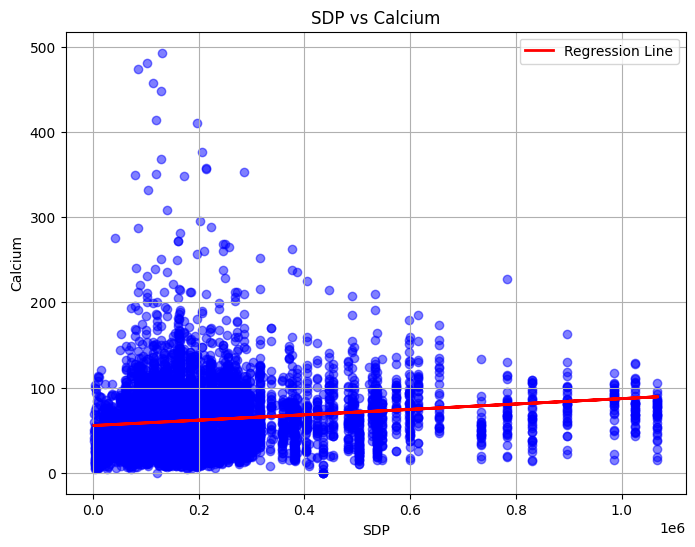

In [206]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, model.coef_[0] * X + model.intercept_, color='red', linewidth=2, label='Regression Line')
plt.title("SDP vs Calcium")
plt.xlabel("SDP")
plt.ylabel("Calcium")
plt.grid(True)
plt.legend()
plt.show()

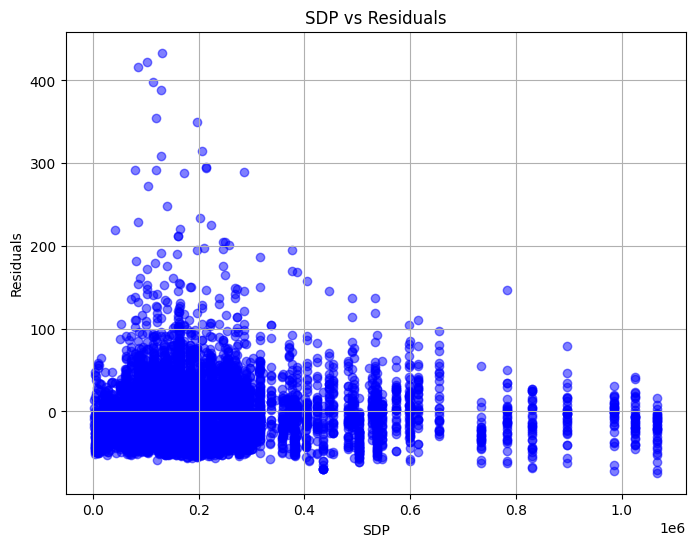

In [207]:
# Plot residuals vs calcium
residuals=y-y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X, np.array(y-y_pred), color='blue', alpha=0.5)
plt.title("SDP vs Residuals")
plt.xlabel("SDP")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

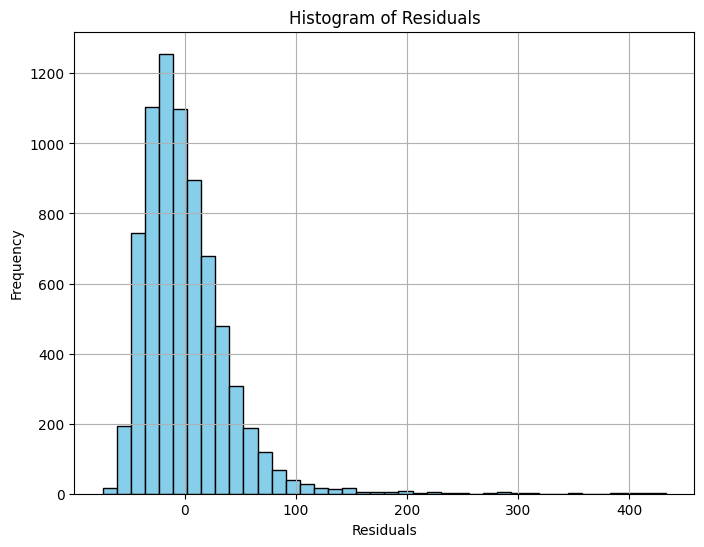

In [208]:
plt.figure(figsize=(8, 6))
# plt.hist(residuals, bins=40, color='#fa50ef', edgecolor='black')
plt.hist(residuals, bins=40, color='skyblue', edgecolor='black')

plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In order to interpret the above regression plot and the OLS Regression table, we notice that coefficient of SDP is 4.71x10(^-5), in essence, if we change the value of independent variable i.e SDP by 1 unit then that would result in a change of 4.71x10(^-5) units on the dependent variable i.e ground-water quality indicator, in this case, calcium. Also, the error coefficient is 53.8226 units and goodness of fit(R-squared) = 0.028 for the above regression as evident by the regression table as well.

In [209]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# reading data from the csv
data = pd.read_csv(r"out.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium'], inplace=True)

# defining the variables
x = data['SDP']
y = data['calcium']

# adding the constant term
x = sm.add_constant(x)

# performing the regression and fitting the model
result = sm.OLS(y, x).fit()

# Calculate model residuals
residuals = result.resid

# Plot Groundwater Quality Indicator (calcium) against SDP
plt.figure(figsize=(8, 6))
plt.scatter(data['SDP'], data['calcium'])
plt.xlabel('SDP')
plt.ylabel('Groundwater Quality Indicator (Calcium)')
plt.title('Groundwater Quality Indicator vs. SDP')
plt.show()


# Plot 1: Residuals vs. SDP
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['SDP'], residuals)
plt.xlabel('SDP')
plt.ylabel('Residuals')
plt.title('Residuals vs. SDP')

# Plot 2: Residuals vs. Groundwater Quality Indicator (Calcium)
plt.subplot(1, 2, 2)
plt.scatter(data['calcium'], residuals)
plt.xlabel('Calcium')
plt.ylabel('Residuals')
plt.title('Residuals vs. Groundwater Quality Indicator (Calcium)')

plt.tight_layout()
plt.show()


'''
Residuals vs. SDP:
This plot shows the relationship between the model residuals and the independent variable SDP.
If the model assumptions are met, we would expect the residuals to be randomly scattered around zero, without any discernible pattern or trend as SDP changes.
Any systematic pattern or trend in the residuals could indicate that the model is not capturing all the information in the data, or there might be issues like heteroscedasticity or 
misspecification of the model.
Groundwater Quality Indicator (Calcium) vs. SDP:
This plot shows the relationship between the groundwater quality indicator (calcium) and SDP.
We might expect some relationship between these variables if SDP is related to the groundwater quality indicator. For example, higher SDP values could be associated with higher or 
lower calcium levels.
The plot should give an indication of how the groundwater quality indicator varies across different levels of SDP.
Overall, the plots help us assess the relationship between the variables and the adequacy of the regression model. If the assumptions hold, the residuals vs. SDP plot should show a 
random scatter around zero, while the Groundwater Quality Indicator vs. SDP plot might show some trend or pattern indicating the relationship between these variables. If the plots do 
not match our expectations, further investigation may be needed to understand potential issues with the model or data.
'''

FileNotFoundError: [Errno 2] No such file or directory: 'out.csv'

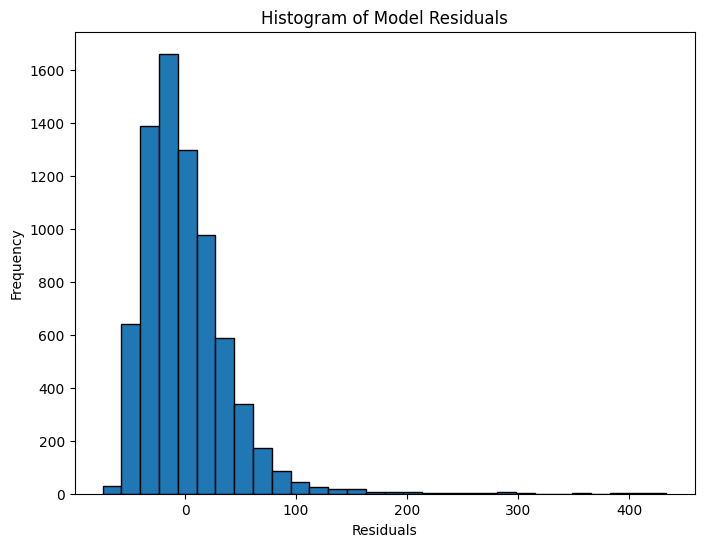

Sum of Residuals: -2.15550244320184e-10


In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# reading data from the csv
data = pd.read_csv(r"out.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium'], inplace=True)

# defining the variables
x = data['SDP']
y = data['calcium']

# adding the constant term
x = sm.add_constant(x)

# performing the regression and fitting the model
result = sm.OLS(y, x).fit()

# Calculate model residuals
residuals = result.resid

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Model Residuals')
plt.show()

# Verify that the sum of residuals is approximately zero
sum_residuals = np.sum(residuals)
print("Sum of Residuals:", sum_residuals)

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Reading data from the csv
data = pd.read_csv(r"Excels\merged_table.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')
data['Gini'] = pd.to_numeric(data['Gini'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium','Gini'], inplace=True)

# Defining the variables
x = data['SDP']  # Independent variable
y = data['calcium']  # Dependent variable
x2 = x ** 2
x3 = x ** 3
x4 = data['Gini']  # Fourth variable

# Create a DataFrame with polynomial features
X = pd.DataFrame({'x': x, 'x2': x2, 'x3': x3, 'x4': x4})
print(X.shape)
# Include or exclude intercept (fit_intercept)
fit_intercept = False  # Set this to False if you want to exclude the intercept

# If fit_intercept is False, remove the constant term
if not fit_intercept:
    X=statsmodels.tools.tools.add_constant(X, prepend=True, has_constant='skip')
print(X)

# Performing the regression and fitting the model
result = sm.OLS(y, X).fit()

# Printing the summary table
print(result.summary())


(7187, 4)
       const          x            x2            x3    x4
0        1.0   151670.0  2.300379e+10  3.488985e+15  0.38
2        1.0   168324.0  2.833297e+10  4.769119e+15  0.38
4        1.0   190029.0  3.611102e+10  6.862141e+15  0.38
5        1.0   201994.0  4.080158e+10  8.241674e+15  0.38
7        1.0   234798.0  5.513010e+10  1.294444e+16  0.38
...      ...        ...           ...           ...   ...
11703    1.0   831025.0  6.906026e+11  5.739080e+17  0.25
11704    1.0   897225.0  8.050127e+11  7.222775e+17  0.25
11705    1.0   985933.0  9.720639e+11  9.583899e+17  0.25
11706    1.0  1026049.0  1.052777e+12  1.080200e+18  0.25
11707    1.0  1067752.0  1.140094e+12  1.217338e+18  0.25

[7187 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                calcium   R-squared:                      -0.051
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Sq

In [210]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Reading data from the csv
data = pd.read_csv(r"Excels\merged_table.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')
data['Gini'] = pd.to_numeric(data['Gini'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium','Gini'], inplace=True)

# Defining the variables
x = data['SDP'].values.reshape(-1, 1)  # Independent variable
y = data['calcium'].values  # Dependent variable
x2 = x ** 2
x3 = x ** 3
x4 = data['Gini'].values.reshape(-1, 1)  # Fourth variable

# Create polynomial features
poly = PolynomialFeatures(degree=3)  # You can change the degree here
X_poly = poly.fit_transform(x)

# Add fourth variable
X_poly = np.concatenate((X_poly, x4), axis=1)

# Fit the model
model = LinearRegression(fit_intercept=True).fit(X_poly, y)

# Get coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Print coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Evaluate R^2
r_squared = model.score(X_poly, y)
print("R^2:", r_squared)


Intercept: 38.077692952282774
Coefficients: [ 0.00000000e+00  2.33811881e-04 -4.87236665e-10  2.91541964e-16
  3.45292750e-11]
R^2: 0.05084670024189275


In [211]:
y_pred=model.predict(X_poly)

In [212]:
y_pred = model.predict(X_poly)

np.sum(y-y_pred)

2.9103830456733704e-11

In [213]:
residuals=(list(y-y_pred))
len(residuals)
# tanishk do from here , apply the methods on residuals

7187

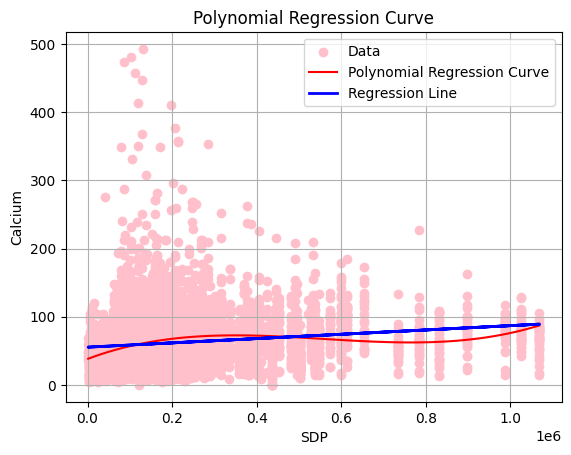

In [214]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of SDP values
sdp_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

# Apply polynomial transformation
sdp_poly = poly.fit_transform(sdp_values)

# Add fourth variable
sdp_poly = np.concatenate((sdp_poly, np.repeat(x4.mean(), len(sdp_poly)).reshape(-1, 1)), axis=1)

# Calculate predicted values
y_pred = model.predict(sdp_poly)

# Plot the data points
plt.scatter(x, y, color='pink', label='Data')

# Plot the polynomial regression curve
plt.plot(sdp_values, y_pred, color='red', label='Polynomial Regression Curve')
plt.plot(X, 3.159791713381556e-05 * X + 55.367403782132804, color='blue', linewidth=2, label='Regression Line')

# Add labels and title
plt.title("Polynomial Regression Curve")
plt.xlabel("SDP")
plt.ylabel("Calcium")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
sdp_poly.shape

(100, 5)